# King County Real Estate - Predicting Home Prices

In this study, I'll be advising clients in King County, Washington who are interested in selling their homes. This study will look at two variables: 

- How much renovations can increase the value of a home.
- The best month of year in which to sell a home.

In order to determine the effect of renovations and month on home prices, I'm using home sale data to build a linear regression model that predicts the value of homes based on a range of variables. By including variables other than month and renovation in our model, we can determine with a higher degree of confidence how renovations and month are related to home prices.

The data set used for this model includes data on home sales in King County, Washington from May 2014 through May 2015.

In [1]:
#Importing necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Inspecting and Cleaning Data

In [2]:
#importing data set on King County 

df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#inspecting the columns for null values and type object.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#dropping unnecessary columns
df = df.drop(['id','lat', 'long'], axis=1)

### Engineering 'month' feature

In [6]:
#creating new column for 'month'.

df['month'] = df['date'].apply(lambda x: int(x.split('/')[0])).apply(lambda x: str(x))
df = df.drop('date', axis=1)

### Converting 'waterfront', 'view', 'condition' and 'grade' to numerical values 

In [7]:
#inspecting waterfront column
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [8]:
#converting waterfront column to binary values

df['waterfront'] = df['waterfront'].fillna('NO')
waterfront_dictionary = {'NO':0, 'YES':1}
df['waterfront'] = df['waterfront'].map(waterfront_dictionary)

In [9]:
#inspecting view column
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [10]:
#converting view column values to numerical 

df['view'] = df['view'].fillna('NONE')
view_dictionary = {'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}
df['view'] = df['view'].map(view_dictionary)

In [11]:
#inspecting condition column
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [12]:
#converting condition column values to numerical 
condition_dictionary = {'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}
df['condition'] = df['condition'].map(condition_dictionary)

In [13]:
#inspecting grade column

df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [14]:
#converting grade column values to numerical 

df['grade'] = df['grade'].apply(lambda x: x.split()[0]).astype(int)

### Cleaning 'sqft_basement' values

In [15]:
#inspecting sqft_basement column

df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [16]:
#converting sqft_basement values to numerical, labeling '?' values as zero 

df['sqft_basement'] = df['sqft_basement'].apply(lambda x: 0 if x=='?' else x)
df['sqft_basement'] = df['sqft_basement'].astype(float)


In [17]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,2.409825,7.657915,1788.596842,285.716581,1970.999676,83.636778,98077.951845,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,399.946414,53.513072,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,0.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,2.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,2.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,3.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


### Engineering Renovation Features

In [18]:
#inspecting renovation value counts
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

Because there are so many houses that have not been renovated, many houses have a 'yr_renovated' value of zero. I'm therefore going to bin renovations by the five year period during which they took place, including only the four five year periods from the past twenty years, since dates before this are unlikely to affect the value of a home.

<AxesSubplot:>

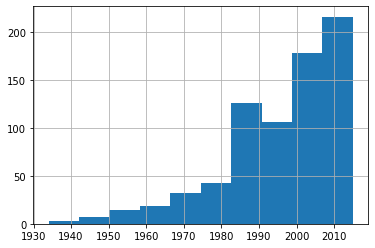

In [19]:
#inspecting renovation dates

df['yr_renovated'].loc[df['yr_renovated']!=0].hist()

In [20]:
#binning renovation dates from the past 20 years into four five year periods and encoding as binaries

df['renovated_2011_2015'] = df['yr_renovated'].apply(lambda x: 1 if x>=2011 else 0)
df['renovated_2006_2010'] = df['yr_renovated'].apply(lambda x: 1 if (x>=2006) & (x<2011) else 0)
df['renovated_2001_2005'] = df['yr_renovated'].apply(lambda x: 1 if (x>=2001) & (x<2006) else 0)
df['renovated_1996_2000'] = df['yr_renovated'].apply(lambda x: 1 if (x>=1996) & (x<2001) else 0)
df = df.drop('yr_renovated', axis=1)

### Converting zipcodes and months to dummy variables

In [21]:
#converting zipcodes to dummies.
df['zipcode'] = df['zipcode'].astype(str)
zipcode_dummies = pd.get_dummies(df['zipcode'], prefix='zip', drop_first=False)
df = df.drop('zipcode', axis=1)

In [22]:
#converting quarters to dummies, removing the first month to avoid multicollinearity. 

month_dummies = pd.get_dummies(df['month'], prefix='m', drop_first=True)
df = df.drop('month', axis=1)

### Adding month dummies to dataframe

For my baseline model, I'm leaving out zipcode dummies.

In [23]:
#data frame with dummies included

df = pd.concat([df, month_dummies], axis=1)

## Evaluating the baseline model

All data from the original data set (other than latitude and longitude) has now been converted to numerical or binary values. 
We're temporarily leaving zipcodes out of the model.

Before testing our baseline model, we'll look at:
- The distribution of the variables
- Collinearity between variables

If variables have non-normal distributions we can improve our model by applying the log function to the variables.

If variables are highly collinear with each other, it means that we can't necessarily trust the coefficients associated with those variables. However, the inclusion of collinear variables may still improve the performance of the model. 

This means that we should only look for high collinearity with month and renovation variables, since these are the only variables that we are trying to provide advice to our clients about.

### Distribution

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>],
       [<AxesSubplot:title={'center':'renovated_2011_2015'}>,
        <AxesSubplot:title={'center':'renovated_2006_2010'}>,
        <AxesSubplot:title={'center':'renovated_2001_2005'}>,
        <AxesSubplot:title={'center':

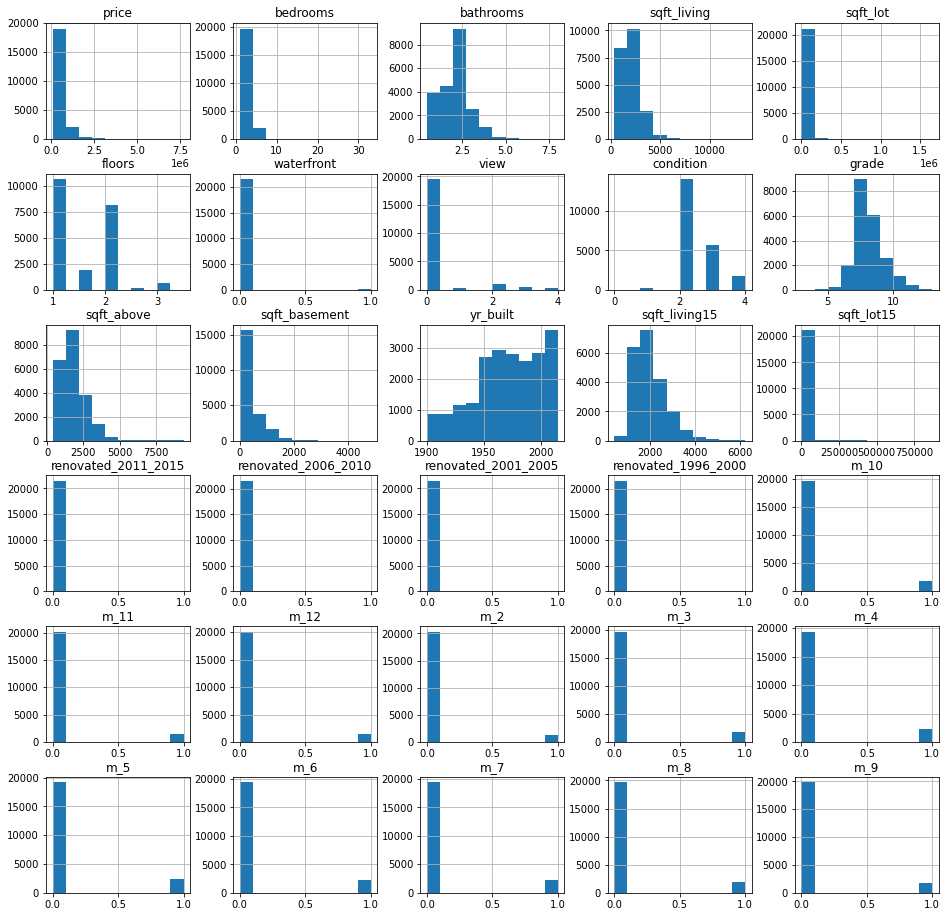

In [24]:
#inspecting distribution of variables
df.hist(figsize=(16,16))

We can see here that the target variable ('price') as well as all of the continuous predictive variables have non-normal distributions.

### Collinearity

In [25]:
#looking for collinearity of predictive variables

predictors = df.drop('price', axis=1)

predictor=predictors.corr().abs().stack().reset_index().sort_values(0, ascending=False)

predictor['pairs'] = list(zip(predictor.level_0, predictor.level_1))
predictor.set_index(['pairs'], inplace = True)
predictor.drop(columns=['level_1', 'level_0'], inplace = True)
predictor.columns = ['correlations']
predictor.drop_duplicates(inplace=True)

predictor.head(30)

,correlations
pairs,
"(bedrooms, bedrooms)",1.000000
"(sqft_living, sqft_above)",0.876448
"(sqft_living, grade)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(sqft_above, grade)",0.756073
"(bathrooms, sqft_living)",0.755758
"(sqft_above, sqft_living15)",0.731767
"(sqft_lot, sqft_lot15)",0.718204
"(sqft_living15, grade)",0.713867


While there is extremely high collinearity between many of the variables in the model, none of them are month or renovation variables, which means that we should be able to trust our model's metrics with regards to these variables.

## Fitting and evaluating the baseline model

In [26]:
from statsmodels.formula.api import ols
X = df.drop('price', axis=1)
outcome = 'price'
x_cols = list(X.columns)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     1423.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:03:08   Log-Likelihood:            -2.9584e+05
No. Observations:               21597   AIC:                         5.917e+05
Df Residuals:                   21567   BIC:                         5.920e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            6.146e+06   1.33e+05     46.067      0.000    5.88e+06    6.41e+06
bedrooms            -3.967e+04   2029.083    -19.552      0.000   -4.37e+04   -3.57e+04
bathrooms            4.524e+04   3489.188     12.965      0.000    3.84e+04    5.21e+04
sqft_living           112.8364     19.338      5.835      0.000      74.933     150.740
sqft_lot                0.0018      0.051      0.036      0.971      -0.098       0.102
floors               2.735e+04   3776.553      7.243      0.000       2e+04    3.48e+04
waterfront           6.145e+05   1.94e+04     31.687      0.000    5.76e+05    6.52e+05
view                  4.38e+04   2245.927     19.502      0.000    3.94e+04    4.82e+04
condition            2.228e+04   2486.679      8.961      0.000    1.74e+04    2.72e+04
grade                  1.2e+05   2252.431     53.295      0.000    1.16e+05    1.24e+05
sqft_above             48.1369     19.309      2.493      0.013      10.289      85.985
sqft_basement          54.2527     19.164      2.831      0.005      16.689      91.816
yr_built            -3544.0732     68.901    -51.437      0.000   -3679.124   -3409.023
sqft_living15          25.1960      3.594      7.011      0.000      18.152      32.240
sqft_lot15             -0.5627      0.078     -7.197      0.000      -0.716      -0.409
renovated_2011_2015   2.83e+04   1.88e+04      1.503      0.133   -8594.329    6.52e+04
renovated_2006_2010  1.377e+05   2.17e+04      6.359      0.000    9.53e+04     1.8e+05
renovated_2001_2005  1.184e+05   2.05e+04      5.784      0.000    7.83e+04    1.58e+05
renovated_1996_2000  1519.2894   2.39e+04      0.064      0.949   -4.52e+04    4.83e+04
m_10                 3903.2827   8499.400      0.459      0.646   -1.28e+04    2.06e+04
m_11                -1326.9099   8967.733     -0.148      0.882   -1.89e+04    1.63e+04
m_12                -4826.0021   8891.352     -0.543      0.587   -2.23e+04    1.26e+04
m_2                  6540.0198   9204.076      0.711      0.477   -1.15e+04    2.46e+04
m_3                  3.421e+04   8497.888      4.026      0.000    1.76e+04    5.09e+04
m_4                  3.815e+04   8264.684      4.616      0.000     2.2e+04    5.44e+04
m_5                  1.358e+04   8169.952      1.663      0.096   -2429.235    2.96e+04
m_6                  3241.3079   8300.665      0.390      0.696    -1.3e+04    1.95e+04
m_7                  -569.9191   8280.394     -0.069      0.945   -1.68e+04    1.57e+04
m_8                  4506.5786   8454.497      0.533      0.594   -1.21e+04    2.11e+04
m_9                 -4239.7854   8584.416     -0.494      0.621   -2.11e+04    1.26e+04
==============================================================================
Omnibus:                    16319.932   Durbin-Watson:                   1.980
Prob(Omnibus):       

With an R-squared value of 0.657, this baseline model accounts for almost two-thirds of the variance of our data set. 

It also shows a statistically significant benefit coming from renovations done between 2001 and 2005, and between 2005 and 2010, with renovations during this period improving home values by an average of around 120,000, with a standard error of 20,000. 

However, we should also be concerned that the model shows no significant effect of renovations done between 2011 and 2015, with the 95% confidence interval including both positive and negative values.

Similarly, only February and March show a significant difference in home prices from the baseline January coefficient of 0, with an average prediction of 36,000 above January prices with a standard error of around 8,300.

Finally, we have a high level of skew and kurtosis in this model, which means that there are a number of outliers, mostly in cases where the model is underestimating the value of homes with higher prices. To improve this model, we'll apply the log function to our continuous variables.

## Converting Continuous Data to Log Values

In [27]:
variables_to_log = ['sqft_living','sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'price']

In [28]:
log_df = pd.DataFrame()
for v in variables_to_log:
    column_name = f'log_{v}'
    log_df[column_name] = df[v].apply(lambda x: 1 if x==0 else x).apply(np.log)

array([[<AxesSubplot:title={'center':'log_sqft_living'}>,
        <AxesSubplot:title={'center':'log_sqft_lot'}>],
       [<AxesSubplot:title={'center':'log_sqft_above'}>,
        <AxesSubplot:title={'center':'log_sqft_living15'}>],
       [<AxesSubplot:title={'center':'log_sqft_lot15'}>,
        <AxesSubplot:title={'center':'log_price'}>]], dtype=object)

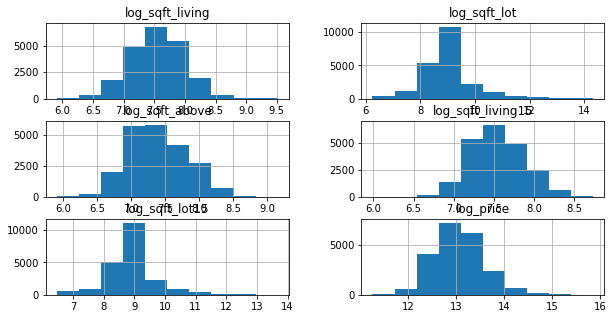

In [29]:
log_df.hist(figsize=(10, 5))

As we can see here, the distributions of the continuous variables are much more normally distributed now.

In [30]:
#dropping the original variables and adding the logged variables to the dataframe
df_with_logs = df.drop(variables_to_log, axis=1)
df_with_logs = pd.concat([df_with_logs, log_df], axis=1)

## Model #2: Continuous Variables as Logarithms

In [31]:
#Testing the model

X=df_with_logs.drop('log_price', axis=1)
outcome = 'log_price'
x_cols = list(X.columns)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_with_logs).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     1478.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:03:08   Log-Likelihood:                -4976.0
No. Observations:               21597   AIC:                         1.001e+04
Df Residuals:                   21567   BIC:                         1.025e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              18.4557      0.200     92.267      0.000      18.064      18.848
bedrooms               -0.0334      0.003    -11.216      0.000      -0.039      -0.028
bathrooms               0.0696      0.005     14.170      0.000       0.060       0.079
floors                  0.0735      0.006     12.352      0.000       0.062       0.085
waterfront              0.4019      0.027     14.624      0.000       0.348       0.456
view                    0.0445      0.003     13.989      0.000       0.038       0.051
condition               0.0450      0.004     12.743      0.000       0.038       0.052
grade                   0.2103      0.003     68.163      0.000       0.204       0.216
sqft_basement        6.322e-05   1.25e-05      5.071      0.000    3.88e-05    8.77e-05
yr_built               -0.0056   9.72e-05    -57.387      0.000      -0.006      -0.005
renovated_2011_2015     0.0889      0.027      3.337      0.001       0.037       0.141
renovated_2006_2010     0.1336      0.031      4.356      0.000       0.073       0.194
renovated_2001_2005     0.0800      0.029      2.760      0.006       0.023       0.137
renovated_1996_2000     0.0464      0.034      1.374      0.170      -0.020       0.113
m_10                    0.0094      0.012      0.784      0.433      -0.014       0.033
m_11                    0.0037      0.013      0.288      0.773      -0.021       0.029
m_12                   -0.0029      0.013     -0.232      0.816      -0.028       0.022
m_2                     0.0125      0.013      0.959      0.338      -0.013       0.038
m_3                     0.0588      0.012      4.889      0.000       0.035       0.082
m_4                     0.0816      0.012      6.971      0.000       0.059       0.104
m_5                     0.0323      0.012      2.797      0.005       0.010       0.055
m_6                     0.0179      0.012      1.522      0.128      -0.005       0.041
m_7                     0.0118      0.012      1.011      0.312      -0.011       0.035
m_8                     0.0163      0.012      1.365      0.172      -0.007       0.040
m_9                     0.0068      0.012      0.563      0.574      -0.017       0.031
log_sqft_living         0.2675      0.026     10.348      0.000       0.217       0.318
log_sqft_lot           -0.0107      0.006     -1.781      0.075      -0.023       0.001
log_sqft_above          0.0200      0.024      0.842      0.400      -0.027       0.067
log_sqft_living15       0.2716      0.011     25.721      0.000       0.251       0.292
log_sqft_lot15         -0.0501      0.007     -7.613      0.000      -0.063      -0.037
==============================================================================
Omnibus:                       66.178   Durbin-Watson:                   1.967
Prob(Omnibus):       

In [32]:
print('renovated_2011_2015 factor:', np.e**0.0889)
print('\nrenovated_2006_2010 factor:', np.e**0.1336)
print('\nrenovated_2001_2005 factor:', np.e**0.0800)

renovated_2011_2015 factor: 1.0929713537259187

renovated_2006_2010 factor: 1.1429355539760195

renovated_2001_2005 factor: 1.0832870676749586


In [33]:
print('march factor: ', np.e**0.0588)
print('\napril factor:', np.e**0.0816)
print('\nmay factor: ', np.e**0.0323)


march factor:  1.0605631069061014

april factor: 1.085021714330505

may factor:  1.0328273070246443


This improved the model significantly, though it has to be interpreted slightly differently from the original model.

Since we are predicting the natural log of price, rather than price, the coefficients represent a multiplication of the baseline price by e^(beta*x). 

Here, we see significant improvements in property value for renovation done in all periods since 2001. Interestingly, renovations done between 2006 and 2010 are predicted to have a greater effect on the value of a home than renovations done between 2011 and 2015.

April sales are predicted to be the most advantageous for sellers, with homes sold during that month predicted to go for 8.5% higher than the January baseline.

In [34]:
df_with_zips = pd.concat([df_with_logs, zipcode_dummies], axis=1)

In [35]:
X=df_with_zips.drop('log_price', axis=1)
outcome = 'log_price'
x_cols = list(X.columns)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_with_zips).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1702.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:03:08   Log-Likelihood:                 6642.0
No. Observations:               21597   AIC:                        -1.309e+04
Df Residuals:                   21498   BIC:                        -1.230e+04
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.7847      0.152     51.129      0.000       7.486       8.083
bedrooms               -0.0151      0.002     -8.508      0.000      -0.019      -0.012
bathrooms               0.0410      0.003     14.160      0.000       0.035       0.047
floors                 -0.0201      0.004     -5.419      0.000      -0.027      -0.013
waterfront              0.4854      0.016     29.782      0.000       0.453       0.517
view                    0.0617      0.002     31.920      0.000       0.058       0.066
condition               0.0543      0.002     25.416      0.000       0.050       0.059
grade                   0.0940      0.002     47.813      0.000       0.090       0.098
sqft_basement        8.018e-06   7.37e-06      1.088      0.277   -6.43e-06    2.25e-05
yr_built               -0.0003   7.14e-05     -4.200      0.000      -0.000      -0.000
renovated_2011_2015     0.1235      0.016      7.903      0.000       0.093       0.154
renovated_2006_2010     0.1455      0.018      8.088      0.000       0.110       0.181
renovated_2001_2005     0.1058      0.017      6.221      0.000       0.072       0.139
renovated_1996_2000     0.0399      0.020      2.012      0.044       0.001       0.079
m_10                   -0.0076      0.007     -1.084      0.278      -0.021       0.006
m_11                   -0.0070      0.007     -0.938      0.348      -0.022       0.008
m_12                    0.0001      0.007      0.017      0.986      -0.014       0.015
m_2                     0.0240      0.008      3.142      0.002       0.009       0.039
m_3                     0.0497      0.007      7.060      0.000       0.036       0.064
m_4                     0.0707      0.007     10.308      0.000       0.057       0.084
m_5                     0.0119      0.007      1.757      0.079      -0.001       0.025
m_6                     0.0036      0.007      0.528      0.598      -0.010       0.017
m_7                    -0.0036      0.007     -0.528      0.597      -0.017       0.010
m_8                    -0.0029      0.007     -0.413      0.679      -0.017       0.011
m_9                    -0.0082      0.007     -1.147      0.251      -0.022       0.006
log_sqft_living         0.2598      0.015     16.969      0.000       0.230       0.290
log_sqft_lot            0.0716      0.004     19.929      0.000       0.065       0.079
log_sqft_above          0.1695      0.014     11.968      0.000       0.142       0.197
log_sqft_living15       0.1557      0.007     23.628      0.000       0.143       0.169
log_sqft_lot15         -0.0204      0.004     -5.160      0.000      -0.028      -0.013
zip_98001              -0.3753      0.010    -37.769      0.000      -0.395      -0.356
zip_98002              -0.3741      0.013    -28.929      0.000      -0.399      -0.349
zip

### Model Residuals - Homoskedasticity

Overall, the model's accuracy has improved significantly, accounting now for almost 90% of the variance in home prices. We can also see that the model is homoskedastic by looking at the plot of the residuals, which shows an only slight funnel shape.

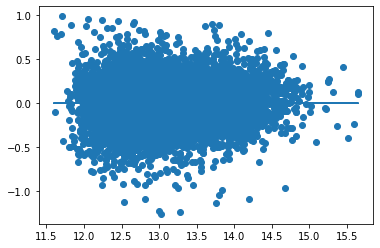

In [36]:
plt.scatter(model.predict(df_with_zips[x_cols]), model.resid)
plt.plot(model.predict(df_with_zips[x_cols]), [0 for i in range(len(df_with_zips))])

### Model Residuals - Normality

The model's residuals have a moderate level of kurtosis - 5.869 - as we can see from the following qqplot, which shows fat tails beyond two standard deviations from the mean.

/Users/davidrichter/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


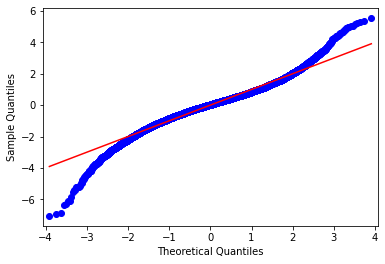

In [37]:
import scipy.stats as stats
import statsmodels.api as sm
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='s', fit=True)

## Renovation and Sale Month 

Here we can see the factors by which home levels are expected to increase above a baseline, given that they fall into a given category.

In [38]:
print('renovated_2011_2015 factor:', np.e**0.1235)
print('\nrenovated_2006_2010 factor:', np.e**0.1455)
print('\nrenovated_2001_2005 factor:', np.e**0.1058)
print('\nrenovated_1996_2000 factor:', np.e**0.0399)

renovated_2011_2015 factor: 1.1314500045420788

renovated_2006_2010 factor: 1.156617734582189

renovated_2001_2005 factor: 1.1115995343661846

renovated_1996_2000 factor: 1.0407066983188493


In [39]:
print('95% Confidence Interval for Home renovations between 2011 and 2015:')
print('Lower Bound: ', np.e**0.093)
print('Upper Bound: ', np.e**0.154)

95% Confidence Interval for Home renovations between 2011 and 2015:
Lower Bound:  1.097461735268082
Upper Bound:  1.1664908867784394


These figures indicate that we have 95% confidence that renovations done between 2011 and 2015 raised the value of homes between 9.7% and 16.6%.

In [40]:
print('february factor:', np.e**0.0240)
print('\nmarch factor:', np.e**0.0497)
print('\napril factor:', np.e**0.0707)

february factor: 1.0242903178906215

march factor: 1.0509557623495802

april factor: 1.0732591998069212


Once we include zipcodes in our model, the standard error of the coefficients decreases significantly, though interestingly, the p value for May went up while the February p value went down. One reason for this is could be that there is some collinearity between May home sales and home sales within higher priced zipcodes. 

## Model Validation

In validating this model, I'll first use a train test split to visualize how well the model predicts the test data after having been trained on a separate set of training data. Next I'll use kfolds cross-validation to run tests on multiple splits of training and testing data to make sure that the model is not overfitting on the training data.

In [41]:
#Importing sklearn libraries to perform validation.

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()

X = df_with_zips.drop('log_price', axis=1)
y=df_with_zips[['log_price']]


In [42]:
#splitting the data into training and testing sets and fitting the model to the testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y)

linreg.fit(X, y)

y_predict = linreg.predict(X_test)

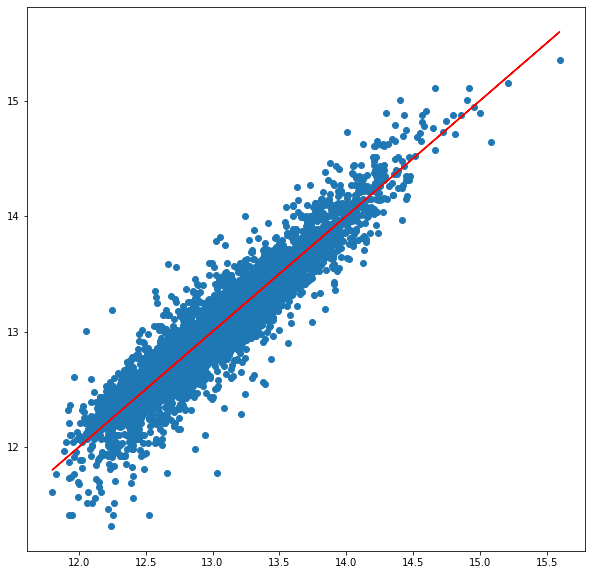

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(y_predict, y_test)
ax.plot(y_predict, y_predict, color='red')

Based on a single train-test-split, the model does not appear to be overfit, since the plot above shows a mostly tight distribution of actual prices around their predicted values.

In [44]:
cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring='r2'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='r2'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='r2'))

In [45]:
print('cross validation, 5 folds:', cv_5_results)
print('cross validation, 10 folds:', cv_10_results)
print('cross validation, 20 folds:', cv_20_results)

cross validation, 5 folds: 0.8832405941259506
cross validation, 10 folds: 0.8829919229066112
cross validation, 20 folds: 0.8834252798240293


The cross validation test shows that the R-squared of the test data is consistently only slightly lower than the R-squared of the training data, indicating that the model hasn't been overfit.

## Recommendations

Based on this analysis, we use can our model to make recommendations to our clients about the value of home renovations. Since we want don't want our clients to lose money on their investment, we recommend that they expect a 9.7% appreciation of their home value based on renovations, which is the lower bound of our 95% confidence interval. 

We multiply the value of the home by 9.7% to find the expected appreciation of their home.

Then we divided this expected appreciation by (1-r), where r is the expected return on capital to calculate the maximum amount of money that they should spend renovating their home including implicit costs. 

For example, let's say our model predicts an unrenovated home value of 200,000 and the expected rate of return on capital is 5%.

In [46]:
print('minimum added value of renovations (97.5% confidence): ', 200000*0.097)
print('maximum amount to spend on renovations: ', 200000*0.097*(1-0.05))

minimum added value of renovations (97.5% confidence):  19400.0
maximum amount to spend on renovations:  18430.0


We further recommend that clients try to sell their home in March or April, when they're likely to get the highest prices.